# Is your Honey Adulterated?

# Data Cleaning and Visualization

In [1]:
import os # for file access
import pandas as pd # for data processing
import numpy as np # for math processing

# for plotting
import plotly.express as px

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

np.random.seed(33)

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN


In [3]:

# Load the dataset
#file = ('D:\Research\Honey Adulteration\new\generated_data.xlsx')
file = ('D:\\Research\\Honey Adulteration\\new\\generated_data.xlsx')
df = pd.read_excel(file)
df.head()

,Brand,Acquisition,Concentration_Class,Concentration,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,...,1020.10nm,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm,Class
0,C11,2,5,5,0.999980,0.999967,0.999203,0.992107,0.953222,0.872113,...,0.477751,0.481703,0.487756,0.497647,0.513220,0.528185,0.544014,0.562675,0.583122,Rewarewa
1,C11,2,5,5,0.999980,0.999968,0.999208,0.992223,0.953823,0.873235,...,0.478158,0.482184,0.488387,0.498356,0.514065,0.529189,0.545075,0.563809,0.584472,Rewarewa
2,C11,2,5,5,0.999979,0.999968,0.999220,0.992204,0.953378,0.872248,...,0.477288,0.481155,0.487180,0.497018,0.512569,0.527521,0.543329,0.561971,0.582424,Rewarewa
3,C11,2,5,5,0.999979,0.999966,0.999189,0.992018,0.952935,0.871801,...,0.477015,0.480936,0.486965,0.496816,0.512370,0.527352,0.543177,0.561848,0.582337,Rewarewa
4,C11,2,5,5,0.999977,0.999965,0.999151,0.991986,0.953458,0.873161,...,0.477190,0.481269,0.487589,0.497584,0.513355,0.528691,0.544639,0.563497,0.584432,Rewarewa


In [4]:
df['Brand'].value_counts()

Brand
C11    7800
C3     6000
C10    4800
C9     3600
C7     3600
C6     3000
C2     1800
C4     1800
C1     1200
C5      600
C8      600
Name: count, dtype: int64

In [5]:
df['Acquisition'].value_counts()

Acquisition
2    5800
3    5800
1    5800
4    5800
5    5800
6    5800
Name: count, dtype: int64

In [6]:
df['Concentration_Class'].value_counts()

Concentration_Class
5     8700
10    8700
25    8700
50    8700
Name: count, dtype: int64

In [7]:
df['Concentration'].value_counts()

Concentration
5     8700
10    8700
25    8700
50    8700
Name: count, dtype: int64

In [8]:
df['Class'].value_counts()

Class
Rewarewa        3600
ManukaUMF10     3600
Clover          3600
ManukaUMF5      3600
Multifloral     2400
ManukaUMF15     2400
Manuka          1800
Tawari          1800
ManukaBlend     1800
Rata            1200
Kamahi          1200
Pohu            1200
BB              1200
ManukaUMF20     1200
ManukaUMF13      600
BorageField      600
ManukaUMF12      600
ManukaUMF18      600
ManukaUMF22      600
Honeydew         600
Field+Tawari     600
Name: count, dtype: int64

In [9]:
df.shape

(34800, 133)

In [10]:
df.dtypes.value_counts()

float64    128
int64        3
object       2
Name: count, dtype: int64

In [11]:
df.head()

,Brand,Acquisition,Concentration_Class,Concentration,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,...,1020.10nm,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm,Class
0,C11,2,5,5,0.999980,0.999967,0.999203,0.992107,0.953222,0.872113,...,0.477751,0.481703,0.487756,0.497647,0.513220,0.528185,0.544014,0.562675,0.583122,Rewarewa
1,C11,2,5,5,0.999980,0.999968,0.999208,0.992223,0.953823,0.873235,...,0.478158,0.482184,0.488387,0.498356,0.514065,0.529189,0.545075,0.563809,0.584472,Rewarewa
2,C11,2,5,5,0.999979,0.999968,0.999220,0.992204,0.953378,0.872248,...,0.477288,0.481155,0.487180,0.497018,0.512569,0.527521,0.543329,0.561971,0.582424,Rewarewa
3,C11,2,5,5,0.999979,0.999966,0.999189,0.992018,0.952935,0.871801,...,0.477015,0.480936,0.486965,0.496816,0.512370,0.527352,0.543177,0.561848,0.582337,Rewarewa
4,C11,2,5,5,0.999977,0.999965,0.999151,0.991986,0.953458,0.873161,...,0.477190,0.481269,0.487589,0.497584,0.513355,0.528691,0.544639,0.563497,0.584432,Rewarewa


In [12]:
Y=df['Concentration']

In [13]:
Y.head()

0    5
1    5
2    5
3    5
4    5
Name: Concentration, dtype: int64

In [14]:
df.drop('Concentration_Class',axis=1,inplace=True)

In [15]:
df.head()

,Brand,Acquisition,Concentration,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,429.38nm,...,1020.10nm,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm,Class
0,C11,2,5,0.999980,0.999967,0.999203,0.992107,0.953222,0.872113,0.728557,...,0.477751,0.481703,0.487756,0.497647,0.513220,0.528185,0.544014,0.562675,0.583122,Rewarewa
1,C11,2,5,0.999980,0.999968,0.999208,0.992223,0.953823,0.873235,0.731307,...,0.478158,0.482184,0.488387,0.498356,0.514065,0.529189,0.545075,0.563809,0.584472,Rewarewa
2,C11,2,5,0.999979,0.999968,0.999220,0.992204,0.953378,0.872248,0.728564,...,0.477288,0.481155,0.487180,0.497018,0.512569,0.527521,0.543329,0.561971,0.582424,Rewarewa
3,C11,2,5,0.999979,0.999966,0.999189,0.992018,0.952935,0.871801,0.728091,...,0.477015,0.480936,0.486965,0.496816,0.512370,0.527352,0.543177,0.561848,0.582337,Rewarewa
4,C11,2,5,0.999977,0.999965,0.999151,0.991986,0.953458,0.873161,0.732385,...,0.477190,0.481269,0.487589,0.497584,0.513355,0.528691,0.544639,0.563497,0.584432,Rewarewa


In [16]:
# Define the mapping dictionary
brand_mapping = {
    'C1': 1,
    'C2': 2,
    'C3': 3,
    'C4': 4,
    'C5': 5,
    'C6': 6,
    'C7': 7,
    'C8': 8,
    'C9': 9,
    'C10': 10,
    'C11': 11,
}

# Map the values in the 'Brand' column using the mapping dictionary
df['Brand'] = df['Brand'].map(brand_mapping)

In [17]:
df.head()

,Brand,Acquisition,Concentration,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,429.38nm,...,1020.10nm,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm,Class
0,11,2,5,0.999980,0.999967,0.999203,0.992107,0.953222,0.872113,0.728557,...,0.477751,0.481703,0.487756,0.497647,0.513220,0.528185,0.544014,0.562675,0.583122,Rewarewa
1,11,2,5,0.999980,0.999968,0.999208,0.992223,0.953823,0.873235,0.731307,...,0.478158,0.482184,0.488387,0.498356,0.514065,0.529189,0.545075,0.563809,0.584472,Rewarewa
2,11,2,5,0.999979,0.999968,0.999220,0.992204,0.953378,0.872248,0.728564,...,0.477288,0.481155,0.487180,0.497018,0.512569,0.527521,0.543329,0.561971,0.582424,Rewarewa
3,11,2,5,0.999979,0.999966,0.999189,0.992018,0.952935,0.871801,0.728091,...,0.477015,0.480936,0.486965,0.496816,0.512370,0.527352,0.543177,0.561848,0.582337,Rewarewa
4,11,2,5,0.999977,0.999965,0.999151,0.991986,0.953458,0.873161,0.732385,...,0.477190,0.481269,0.487589,0.497584,0.513355,0.528691,0.544639,0.563497,0.584432,Rewarewa


In [18]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [19]:
# Fit and transform the selected column
df['Class'] = label_encoder.fit_transform(df['Class'])

In [20]:
df.head()

,Brand,Acquisition,Concentration,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,429.38nm,...,1020.10nm,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm,Class
0,11,2,5,0.999980,0.999967,0.999203,0.992107,0.953222,0.872113,0.728557,...,0.477751,0.481703,0.487756,0.497647,0.513220,0.528185,0.544014,0.562675,0.583122,19
1,11,2,5,0.999980,0.999968,0.999208,0.992223,0.953823,0.873235,0.731307,...,0.478158,0.482184,0.488387,0.498356,0.514065,0.529189,0.545075,0.563809,0.584472,19
2,11,2,5,0.999979,0.999968,0.999220,0.992204,0.953378,0.872248,0.728564,...,0.477288,0.481155,0.487180,0.497018,0.512569,0.527521,0.543329,0.561971,0.582424,19
3,11,2,5,0.999979,0.999966,0.999189,0.992018,0.952935,0.871801,0.728091,...,0.477015,0.480936,0.486965,0.496816,0.512370,0.527352,0.543177,0.561848,0.582337,19
4,11,2,5,0.999977,0.999965,0.999151,0.991986,0.953458,0.873161,0.732385,...,0.477190,0.481269,0.487589,0.497584,0.513355,0.528691,0.544639,0.563497,0.584432,19


In [21]:
df['Class'].value_counts()

Class
19    3600
8     3600
2     3600
15    3600
16    2400
11    2400
6     1800
20    1800
7     1800
18    1200
5     1200
17    1200
0     1200
13    1200
10     600
1      600
9      600
12     600
14     600
4      600
3      600
Name: count, dtype: int64

In [22]:
df.head()

,Brand,Acquisition,Concentration,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,429.38nm,...,1020.10nm,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm,Class
0,11,2,5,0.999980,0.999967,0.999203,0.992107,0.953222,0.872113,0.728557,...,0.477751,0.481703,0.487756,0.497647,0.513220,0.528185,0.544014,0.562675,0.583122,19
1,11,2,5,0.999980,0.999968,0.999208,0.992223,0.953823,0.873235,0.731307,...,0.478158,0.482184,0.488387,0.498356,0.514065,0.529189,0.545075,0.563809,0.584472,19
2,11,2,5,0.999979,0.999968,0.999220,0.992204,0.953378,0.872248,0.728564,...,0.477288,0.481155,0.487180,0.497018,0.512569,0.527521,0.543329,0.561971,0.582424,19
3,11,2,5,0.999979,0.999966,0.999189,0.992018,0.952935,0.871801,0.728091,...,0.477015,0.480936,0.486965,0.496816,0.512370,0.527352,0.543177,0.561848,0.582337,19
4,11,2,5,0.999977,0.999965,0.999151,0.991986,0.953458,0.873161,0.732385,...,0.477190,0.481269,0.487589,0.497584,0.513355,0.528691,0.544639,0.563497,0.584432,19


In [23]:
df.drop('Concentration',axis=1,inplace=True)

In [24]:
X=df

# Splitting the dataset

In [25]:
from sklearn.model_selection import train_test_split

# 7:3

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42,shuffle=True)

# Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, explained_variance_score, median_absolute_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_log_error, max_error


In [28]:
# Initialize the Linear Regression model
model = LinearRegression()

In [29]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [30]:

# Make predictions on the testing data
y_pred = model.predict(X_test)

In [31]:

# Calculate Mean Squared Error (MSE) as a measure of model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.6076478733345836


In [32]:
# Calculate Mean Squared Logarithmic Error (MSLE)
msle = mean_squared_log_error(y_test, y_pred)
print("Mean Squared Logarithmic Error:", msle)

Mean Squared Logarithmic Error: 0.012944812617170016


In [33]:
# Calculate Mean Squared Percentage Error (MSPE)
mspe = np.mean(np.square((y_test - y_pred) / y_test)) * 100
print("Mean Squared Percentage Error:", mspe)

Mean Squared Percentage Error: 1.8462891775937291


In [34]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.9686179208765655


In [35]:
# Calculate Median Absolute Error
median_absolute_err = median_absolute_error(y_test, y_pred)
print("Median Absolute Error:", median_absolute_err)

Median Absolute Error: 0.7766025904206799


In [36]:
# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error:", mape)

Mean Absolute Percentage Error: 8.461455975850301


In [37]:
# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9947908774196826


In [38]:
# Calculate Max Error
max_err = max_error(y_test, y_pred)
print("Max Error:", max_err)

Max Error: 8.353921368790452


In [39]:
# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_variance)

Explained Variance Score: 0.9947914311811991


# Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)


In [42]:

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:

# Predict the concentrations on the testing data
y_pred = rf_regressor.predict(X_test)

In [44]:
# Calculate Mean Squared Logarithmic Error (MSLE)
msle = mean_squared_log_error(y_test, y_pred)
print("Mean Squared Logarithmic Error:", msle)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Squared Percentage Error (MSPE)
mspe = np.mean(np.square((y_test - y_pred) / y_test)) * 100
print("Mean Squared Percentage Error:", mspe)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error:", mape)

# Calculate Median Absolute Error
medae = median_absolute_error(y_test, y_pred)
print("Median Absolute Error:", medae)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Max Error
max_err = max_error(y_test, y_pred)
print("Max Error:", max_err)

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_variance)

Mean Squared Logarithmic Error: 0.0017560699451221844
Mean Squared Error: 0.24939415708812257
Mean Squared Percentage Error: 0.26632550766283525
Mean Absolute Error: 0.1146551724137931
Mean Absolute Percentage Error: 1.3980363984674327
Median Absolute Error: 0.0
R-squared: 0.9991919096484777
Max Error: 19.75
Explained Variance Score: 0.9991919318048138


# MLP Regressor

In [45]:
from sklearn.neural_network import MLPRegressor

In [46]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [47]:
# Initialize the MLPRegressor (neural network) model
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)


In [48]:
# Fit the model to the scaled training data
mlp_regressor.fit(X_train_scaled, y_train)


MLPRegressor(hidden_layer_sizes=(100, 50), random_state=42)

In [49]:
# Predict the concentrations on the scaled testing data
y_pred = mlp_regressor.predict(X_test_scaled)

In [50]:
# Calculate Mean Squared Logarithmic Error (MSLE)
msle = mean_squared_log_error(y_test, y_pred)
print("Mean Squared Logarithmic Error:", msle)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Squared Percentage Error (MSPE)
mspe = np.mean(np.square((y_test - y_pred) / y_test)) * 100
print("Mean Squared Percentage Error:", mspe)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error:", mape)

# Calculate Median Absolute Error
medae = median_absolute_error(y_test, y_pred)
print("Median Absolute Error:", medae)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Max Error
max_err = max_error(y_test, y_pred)
print("Max Error:", max_err)

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_variance)

Mean Squared Logarithmic Error: 0.0043126130233442726
Mean Squared Error: 0.4050728824483903
Mean Squared Percentage Error: 0.6608569823892747
Mean Absolute Error: 0.4777690686052705
Mean Absolute Percentage Error: 4.671541834825694
Median Absolute Error: 0.3698738045667316
R-squared: 0.998687477317866
Max Error: 3.5296351455827324
Explained Variance Score: 0.998726178630479


# SVR regressor

In [83]:
from sklearn.svm import SVR

In [84]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [85]:
# Initialize the SVR model
svr_regressor = SVR(kernel='rbf')

In [86]:

# Fit the model to the scaled training data
svr_regressor.fit(X_train_scaled, y_train)

SVR()

In [87]:

# Predict the concentrations on the scaled testing data
y_pred = svr_regressor.predict(X_test_scaled)

In [88]:
# Calculate Mean Squared Logarithmic Error (MSLE)
#msle = mean_squared_log_error(y_test, y_pred)
#print("Mean Squared Logarithmic Error:", msle)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Squared Percentage Error (MSPE)
mspe = np.mean(np.square((y_test - y_pred) / y_test)) * 100
print("Mean Squared Percentage Error:", mspe)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error:", mape)

# Calculate Median Absolute Error
medae = median_absolute_error(y_test, y_pred)
print("Median Absolute Error:", medae)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Max Error
max_err = max_error(y_test, y_pred)
print("Max Error:", max_err)

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_variance)

Mean Squared Error: 3.6219294809382854
Mean Squared Percentage Error: 3.2068665183215925
Mean Absolute Error: 1.43458358731237
Mean Absolute Percentage Error: 11.68820259867852
Median Absolute Error: 1.1030607014643685
R-squared: 0.988187705760071
Max Error: 9.5213502646955
Explained Variance Score: 0.9881878105887176


# KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

X_test = X_test.values

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9992816091954023

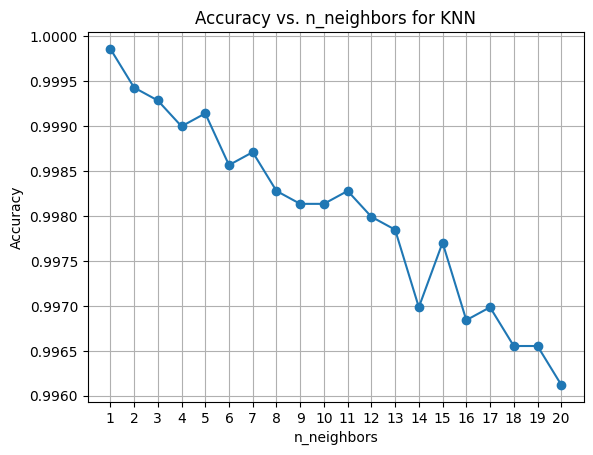

In [90]:
import warnings
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Suppress all warnings
warnings.filterwarnings("ignore")

# Initialize lists to store results
n_neighbors_values = []
accuracy_values = []

# Test different values of n_neighbors
for n_neighbors in range(1, 21):
    # Initialize the KNeighborsClassifier with the current n_neighbors value
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy and store the values
    accuracy = accuracy_score(y_test, y_pred)
    n_neighbors_values.append(n_neighbors)
    accuracy_values.append(accuracy)

# Plot the accuracy values
plt.plot(n_neighbors_values, accuracy_values, marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. n_neighbors for KNN')
plt.xticks(n_neighbors_values)
plt.grid()
plt.show()


In [91]:

# # Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm)


confusion matrix:
 [[1744    6    0    0]
 [  20 1668    0    0]
 [   0    0 1771    1]
 [   0    0    0 1750]]


In [92]:
# Extract values from the confusion matrix
true_negatives = cm[0, 0]
false_positives = cm[0, 1]
false_negatives = cm[1, 0]
true_positives = cm[1, 1]


In [93]:

# Calculate False Positive Rate (FPR)
fpr = false_positives / (false_positives + true_negatives)
print("False Positive Rate (FPR):", fpr)

False Positive Rate (FPR): 0.0034285714285714284


In [94]:
# Calculate False Negative Rate (FNR)
fnr = false_negatives / (false_negatives + true_positives)
print("False Negative Rate (FNR):", fnr)

False Negative Rate (FNR): 0.011848341232227487


In [95]:
# Calculate Recall (True Positive Rate)
recall = true_positives / (true_positives + false_negatives)
print("Recall:", recall)

Recall: 0.9881516587677726


In [96]:
# Calculate Precision
precision = true_positives / (true_positives + false_positives)
print("Precision:", precision)

Precision: 0.996415770609319


In [97]:
from sklearn.metrics import fbeta_score

# Calculate the F-beta score with the 'macro' average option
beta = 2  # You can adjust the value of beta as needed
f_beta_macro = fbeta_score(y_test, y_pred, beta=beta, average='macro')
print(f"F-beta (beta={beta}, average='macro'):", f_beta_macro)


F-beta (beta=2, average='macro'): 0.9960517917173612


In [98]:

# Calculate Cohen's Kappa
cohen_kappa_score(y_test, y_pred)

0.9948269064509677

In [99]:
# F1-score = 2 * (Precision * Recall) / (Precision + Recall)
F1score = 2 * (precision * recall) / (precision + recall)
print("F1-score:", F1score)

F1-score: 0.9922665080309341


# 8:2

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)

# Linear Regression

In [101]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

In [102]:
# Calculate Mean Squared Logarithmic Error (MSLE)
msle = mean_squared_log_error(y_test, y_pred)
print("Mean Squared Logarithmic Error:", msle)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Squared Percentage Error (MSPE)
mspe = np.mean(np.square((y_test - y_pred) / y_test)) * 100
print("Mean Squared Percentage Error:", mspe)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error:", mape)

# Calculate Median Absolute Error
medae = median_absolute_error(y_test, y_pred)
print("Median Absolute Error:", medae)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Max Error
max_err = max_error(y_test, y_pred)
print("Max Error:", max_err)

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_variance)

Mean Squared Logarithmic Error: 0.012363527649049804
Mean Squared Error: 1.5878353557061384
Mean Squared Percentage Error: 1.788038275460192
Mean Absolute Error: 0.9694387130208739
Mean Absolute Percentage Error: 8.397854871375058
Median Absolute Error: 0.7837045838314225
R-squared: 0.9948215506334749
Max Error: 7.5275175843054285
Explained Variance Score: 0.9948215546888871


# Random Forest Regressor

In [103]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [104]:
# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [105]:
# Predict the concentrations on the testing data
y_pred = rf_regressor.predict(X_test)

In [106]:
# Calculate Mean Squared Logarithmic Error (MSLE)
msle = mean_squared_log_error(y_test, y_pred)
print("Mean Squared Logarithmic Error:", msle)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Squared Percentage Error (MSPE)
mspe = np.mean(np.square((y_test - y_pred) / y_test)) * 100
print("Mean Squared Percentage Error:", mspe)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error:", mape)

# Calculate Median Absolute Error
medae = median_absolute_error(y_test, y_pred)
print("Median Absolute Error:", medae)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Max Error
max_err = max_error(y_test, y_pred)
print("Max Error:", max_err)

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_variance)

Mean Squared Logarithmic Error: 0.001409818291147406
Mean Squared Error: 0.2556479885057471
Mean Squared Percentage Error: 0.2143607471264368
Mean Absolute Error: 0.10170977011494252
Mean Absolute Percentage Error: 1.1952298850574712
Median Absolute Error: 0.0
R-squared: 0.9991662484656401
Max Error: 15.0
Explained Variance Score: 0.9991662486837728


# MLP Regressor

In [107]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the MLPRegressor (neural network) model
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

In [108]:
# Fit the model to the scaled training data
mlp_regressor.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), random_state=42)

In [109]:
# Predict the concentrations on the scaled testing data
y_pred = mlp_regressor.predict(X_test_scaled)

In [110]:
# Calculate Mean Squared Logarithmic Error (MSLE)
msle = mean_squared_log_error(y_test, y_pred)
print("Mean Squared Logarithmic Error:", msle)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Squared Percentage Error (MSPE)
mspe = np.mean(np.square((y_test - y_pred) / y_test)) * 100
print("Mean Squared Percentage Error:", mspe)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error:", mape)

# Calculate Median Absolute Error
medae = median_absolute_error(y_test, y_pred)
print("Median Absolute Error:", medae)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Max Error
max_err = max_error(y_test, y_pred)
print("Max Error:", max_err)

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_variance)

Mean Squared Logarithmic Error: 0.004598826721821659
Mean Squared Error: 0.4050258140586802
Mean Squared Percentage Error: 0.7166518140937043
Mean Absolute Error: 0.47873226228985016
Mean Absolute Percentage Error: 4.883403351044559
Median Absolute Error: 0.37148811930699743
R-squared: 0.9986790786193914
Max Error: 3.384956092509917
Explained Variance Score: 0.9986948293672542


# SVR regressor

In [111]:
from sklearn.svm import SVR

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVR model
svr_regressor = SVR(kernel='rbf')

In [112]:
# Fit the model to the scaled training data
svr_regressor.fit(X_train_scaled, y_train)

SVR()

In [113]:
# Predict the concentrations on the scaled testing data
y_pred = svr_regressor.predict(X_test_scaled)

In [114]:
# Calculate Mean Squared Logarithmic Error (MSLE)
#msle = mean_squared_log_error(y_test, y_pred)
#print("Mean Squared Logarithmic Error:", msle)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Squared Percentage Error (MSPE)
mspe = np.mean(np.square((y_test - y_pred) / y_test)) * 100
print("Mean Squared Percentage Error:", mspe)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error:", mape)

# Calculate Median Absolute Error
medae = median_absolute_error(y_test, y_pred)
print("Median Absolute Error:", medae)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Max Error
max_err = max_error(y_test, y_pred)
print("Max Error:", max_err)

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_variance)

Mean Squared Error: 3.6219294809382854
Mean Squared Percentage Error: 3.2068665183215925
Mean Absolute Error: 1.43458358731237
Mean Absolute Percentage Error: 11.68820259867852
Median Absolute Error: 1.1030607014643685
R-squared: 0.988187705760071
Max Error: 9.5213502646955
Explained Variance Score: 0.9881878105887176


# KNN

In [115]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

X_test = X_test.values

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9992816091954023

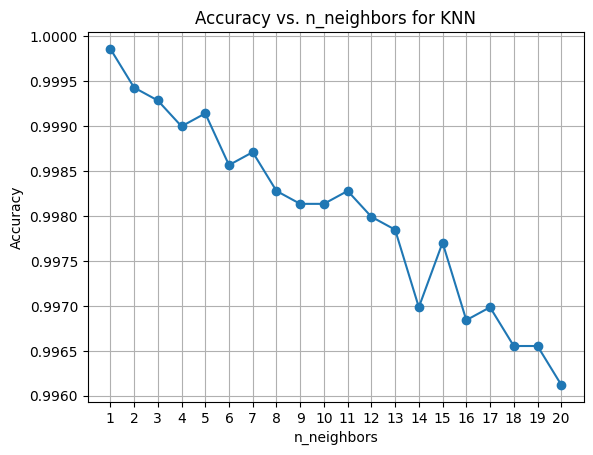

In [116]:
import warnings
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Suppress all warnings
warnings.filterwarnings("ignore")

# Initialize lists to store results
n_neighbors_values = []
accuracy_values = []

# Test different values of n_neighbors
for n_neighbors in range(1, 21):
    # Initialize the KNeighborsClassifier with the current n_neighbors value
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy and store the values
    accuracy = accuracy_score(y_test, y_pred)
    n_neighbors_values.append(n_neighbors)
    accuracy_values.append(accuracy)

# Plot the accuracy values
plt.plot(n_neighbors_values, accuracy_values, marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. n_neighbors for KNN')
plt.xticks(n_neighbors_values)
plt.grid()
plt.show()


In [117]:

# # Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm)


confusion matrix:
 [[1744    6    0    0]
 [  20 1668    0    0]
 [   0    0 1771    1]
 [   0    0    0 1750]]


In [118]:
# Extract values from the confusion matrix
true_negatives = cm[0, 0]
false_positives = cm[0, 1]
false_negatives = cm[1, 0]
true_positives = cm[1, 1]


In [119]:

# Calculate False Positive Rate (FPR)
fpr = false_positives / (false_positives + true_negatives)
print("False Positive Rate (FPR):", fpr)

False Positive Rate (FPR): 0.0034285714285714284


In [120]:
# Calculate False Negative Rate (FNR)
fnr = false_negatives / (false_negatives + true_positives)
print("False Negative Rate (FNR):", fnr)

False Negative Rate (FNR): 0.011848341232227487


In [121]:
# Calculate Recall (True Positive Rate)
recall = true_positives / (true_positives + false_negatives)
print("Recall:", recall)

Recall: 0.9881516587677726


In [122]:
# Calculate Precision
precision = true_positives / (true_positives + false_positives)
print("Precision:", precision)

Precision: 0.996415770609319


In [123]:
from sklearn.metrics import fbeta_score

# Calculate the F-beta score with the 'macro' average option
beta = 2  # You can adjust the value of beta as needed
f_beta_macro = fbeta_score(y_test, y_pred, beta=beta, average='macro')
print(f"F-beta (beta={beta}, average='macro'):", f_beta_macro)


F-beta (beta=2, average='macro'): 0.9960517917173612


In [124]:

# Calculate Cohen's Kappa
cohen_kappa_score(y_test, y_pred)

0.9948269064509677

In [125]:
# F1-score = 2 * (Precision * Recall) / (Precision + Recall)
F1score = 2 * (precision * recall) / (precision + recall)
print("F1-score:", F1score)

F1-score: 0.9922665080309341


# 9:1

In [126]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=42,shuffle=True)

# Linear Regression

In [127]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

In [128]:
# Calculate Mean Squared Logarithmic Error (MSLE)
msle = mean_squared_log_error(y_test, y_pred)
print("Mean Squared Logarithmic Error:", msle)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Squared Percentage Error (MSPE)
mspe = np.mean(np.square((y_test - y_pred) / y_test)) * 100
print("Mean Squared Percentage Error:", mspe)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error:", mape)

# Calculate Median Absolute Error
medae = median_absolute_error(y_test, y_pred)
print("Median Absolute Error:", medae)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Max Error
max_err = max_error(y_test, y_pred)
print("Max Error:", max_err)

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_variance)

Mean Squared Logarithmic Error: 0.013001598311287346
Mean Squared Error: 1.5697508630307055
Mean Squared Percentage Error: 1.8643869787958598
Mean Absolute Error: 0.9582142463870076
Mean Absolute Percentage Error: 8.440489701736682
Median Absolute Error: 0.7698960197049018
R-squared: 0.9948183534540256
Max Error: 7.482015914374642
Explained Variance Score: 0.9948195255852251


# Random Forest Regressor

In [129]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [130]:
# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [131]:
# Predict the concentrations on the testing data
y_pred = rf_regressor.predict(X_test)

In [132]:
# Calculate Mean Squared Logarithmic Error (MSLE)
msle = mean_squared_log_error(y_test, y_pred)
print("Mean Squared Logarithmic Error:", msle)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Squared Percentage Error (MSPE)
mspe = np.mean(np.square((y_test - y_pred) / y_test)) * 100
print("Mean Squared Percentage Error:", mspe)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error:", mape)

# Calculate Median Absolute Error
medae = median_absolute_error(y_test, y_pred)
print("Median Absolute Error:", medae)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Max Error
max_err = max_error(y_test, y_pred)
print("Max Error:", max_err)

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_variance)

Mean Squared Logarithmic Error: 0.0015442572026894428
Mean Squared Error: 0.32059482758620694
Mean Squared Percentage Error: 0.22423206896551728
Mean Absolute Error: 0.10109195402298853
Mean Absolute Percentage Error: 1.1574712643678162
Median Absolute Error: 0.0
R-squared: 0.9989417371124664
Max Error: 19.5
Explained Variance Score: 0.9989417875270731


# MLP Regressor

In [133]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the MLPRegressor (neural network) model
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

In [134]:
# Fit the model to the scaled training data
mlp_regressor.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), random_state=42)

In [135]:
# Predict the concentrations on the scaled testing data
y_pred = mlp_regressor.predict(X_test_scaled)

In [136]:
# Calculate Mean Squared Logarithmic Error (MSLE)
msle = mean_squared_log_error(y_test, y_pred)
print("Mean Squared Logarithmic Error:", msle)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Squared Percentage Error (MSPE)
mspe = np.mean(np.square((y_test - y_pred) / y_test)) * 100
print("Mean Squared Percentage Error:", mspe)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error:", mape)

# Calculate Median Absolute Error
medae = median_absolute_error(y_test, y_pred)
print("Median Absolute Error:", medae)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Max Error
max_err = max_error(y_test, y_pred)
print("Max Error:", max_err)

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_variance)

Mean Squared Logarithmic Error: 0.004523824001427342
Mean Squared Error: 0.4025904866613677
Mean Squared Percentage Error: 0.7027767454658084
Mean Absolute Error: 0.4753475640478225
Mean Absolute Percentage Error: 4.866640126416611
Median Absolute Error: 0.3686990408183828
R-squared: 0.9986710747203391
Max Error: 3.070510697143801
Explained Variance Score: 0.998706789173927


# SVR regressor

In [137]:
from sklearn.svm import SVR

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVR model
svr_regressor = SVR(kernel='rbf')

In [138]:
# Fit the model to the scaled training data
svr_regressor.fit(X_train_scaled, y_train)


SVR()

In [139]:
# Predict the concentrations on the scaled testing data
y_pred = svr_regressor.predict(X_test_scaled)

In [140]:
# Calculate Mean Squared Logarithmic Error (MSLE)
#msle = mean_squared_log_error(y_test, y_pred)
#print("Mean Squared Logarithmic Error:", msle)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Squared Percentage Error (MSPE)
mspe = np.mean(np.square((y_test - y_pred) / y_test)) * 100
print("Mean Squared Percentage Error:", mspe)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error:", mape)

# Calculate Median Absolute Error
medae = median_absolute_error(y_test, y_pred)
print("Median Absolute Error:", medae)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Max Error
max_err = max_error(y_test, y_pred)
print("Max Error:", max_err)

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_variance)

Mean Squared Error: 3.26108639257158
Mean Squared Percentage Error: 3.065872752613224
Mean Absolute Error: 1.3601649784358054
Mean Absolute Percentage Error: 11.28433687075024
Median Absolute Error: 1.0404467064231007
R-squared: 0.9892353637509277
Max Error: 9.369661739991209
Explained Variance Score: 0.9892355679267941


# KNN

In [141]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

X_test = X_test.values

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9994252873563219

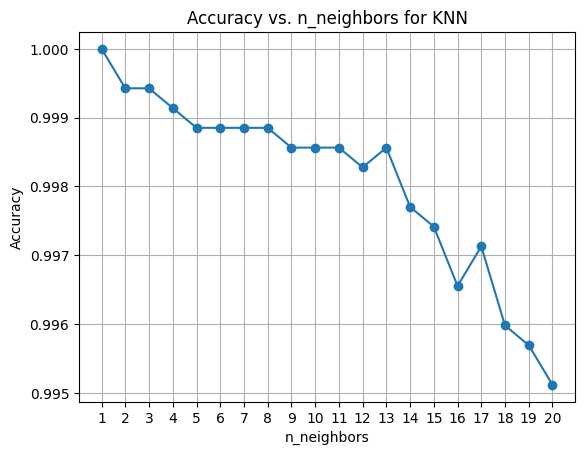

In [142]:
import warnings
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Suppress all warnings
warnings.filterwarnings("ignore")

# Initialize lists to store results
n_neighbors_values = []
accuracy_values = []

# Test different values of n_neighbors
for n_neighbors in range(1, 21):
    # Initialize the KNeighborsClassifier with the current n_neighbors value
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy and store the values
    accuracy = accuracy_score(y_test, y_pred)
    n_neighbors_values.append(n_neighbors)
    accuracy_values.append(accuracy)

# Plot the accuracy values
plt.plot(n_neighbors_values, accuracy_values, marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. n_neighbors for KNN')
plt.xticks(n_neighbors_values)
plt.grid()
plt.show()


In [143]:

# # Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm)


confusion matrix:
 [[881   5   0   0]
 [ 11 846   0   0]
 [  0   0 885   1]
 [  0   0   0 851]]


In [144]:
# Extract values from the confusion matrix
true_negatives = cm[0, 0]
false_positives = cm[0, 1]
false_negatives = cm[1, 0]
true_positives = cm[1, 1]


In [145]:

# Calculate False Positive Rate (FPR)
fpr = false_positives / (false_positives + true_negatives)
print("False Positive Rate (FPR):", fpr)

False Positive Rate (FPR): 0.0056433408577878106


In [146]:
# Calculate False Negative Rate (FNR)
fnr = false_negatives / (false_negatives + true_positives)
print("False Negative Rate (FNR):", fnr)

False Negative Rate (FNR): 0.012835472578763127


In [147]:
# Calculate Recall (True Positive Rate)
recall = true_positives / (true_positives + false_negatives)
print("Recall:", recall)

Recall: 0.9871645274212368


In [148]:
# Calculate Precision
precision = true_positives / (true_positives + false_positives)
print("Precision:", precision)

Precision: 0.9941245593419507


In [149]:
from sklearn.metrics import fbeta_score

# Calculate the F-beta score with the 'macro' average option
beta = 2  # You can adjust the value of beta as needed
f_beta_macro = fbeta_score(y_test, y_pred, beta=beta, average='macro')
print(f"F-beta (beta={beta}, average='macro'):", f_beta_macro)


F-beta (beta=2, average='macro'): 0.9951055869495677


In [150]:

# Calculate Cohen's Kappa
cohen_kappa_score(y_test, y_pred)

0.9934857430156451

In [151]:
# F1-score = 2 * (Precision * Recall) / (Precision + Recall)
F1score = 2 * (precision * recall) / (precision + recall)
print("F1-score:", F1score)

F1-score: 0.990632318501171
